# Learning Outcome

1. Load, display and save images
2. Load, show and save videos
3. Resize images (Image acquistion, Resizing)


## Why openCV?
- Compatible in multiple MAJOR OS like Windows, Linux and MacOS, can be written in different languages: C++, Python and Java
- Interopterable with Numpy modules, thereby faster computation of image array
- Large community support on the module, alot of resources online (articles and stackoverflow posts)


## Image Formats
- JPEG (.jpg, .jpeg, .jfif)
    - photos taken from camera

- PNG (.png)
    - website, larger file size compare to JPEG
    
- tiff (.tif)
    - high quality printing, large file size
    
- bmp (.bmp)
    - muliple uses, large file size

- GIF (.gif)
    - animations, shallow color depth
    
- webp (.webp) (Develop by google)
    - Smaller file size compare to JPEG and PNG, not supported by IE 11

## Setup

In [4]:
import sys

# at least Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

In [5]:
# Check OpenCV version
print(cv.__version__)

4.8.0


## Load and show images

In [6]:
img = cv.imread("images/lena.jfif")
# second argument: 1 (default), 0 (grayscale), -1(cv.IMREAD_UNCHANGED)
grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0) # Key binding function: wait for user response
cv.destroyAllWindows()

In [7]:
def show_img(window_name, img):
    """2 arguments: windown name and image"""
    
    cv.imshow(window_name, img)
    cv.waitKey(0) # Key binding function: wait for user response
    cv.destroyAllWindows()

In [5]:
# png

img = cv.imread("images/lena.png")

show_img("lena", img)

In [6]:
#difference between jpeg and png
img_jpeg = cv.imread("images/lena.jpg", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"shape of jpeg image: {img_jpeg.shape}")
print(f"shape of png image: {img_png.shape}")

shape of jpeg image: (225, 225, 3)
shape of png image: (225, 225, 4)


### gif
import new module

In [7]:
!pip install imageio


In [8]:
import imageio

In [9]:
# gif
GIF = imageio.mimread("images/rotating_earth_large.gif")

# change to BGR from RGB
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(200)
    
cv.destroyAllWindows()

## Save images
cv.imwrite(filepath, img)

In [10]:
# a more formalized approach
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("img",img)
k = cv.waitKey(0) & 0xFF

if k == 115: # press 's' button
    cv.imwrite("lena_save.jpg",img)
    
cv.destroyAllWindows()

## Same Operations on videos
Load and show windows

In [9]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file fould")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read() #ret is a boolean
    
    if not ret:
        print("No frame received!")
        break
    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows()
        

In [12]:
import time

In [13]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file fould")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read() #ret is a boolean
    
    if not ret:
        print("No frame received!")
        break
    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
end = time.time()       
# cap.release()
cv.destroyAllWindows()
        

In [18]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
        sys.exit("No webcam found")
        
#save video object
#arguments: filemath, fourcc (algorithm, for compression and decompression of the video file), fps, width and height

fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    ret, frame = cap.read() #ret is a boolean
    
    if not ret:
        print("No frame received!")
        break
    
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

SystemExit: No webcam found

C:\Users\fict\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
print(f"The actual frame rate form the file: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The fps if stream using OpenCV: {n_frames/(end-start)}")

The actual frame rate form the file: 60.0
The fps if stream using OpenCV: 1093.2491618284405


## Image resizing
1. set arbitary dimension (w, h).
2. scale factor

In [21]:
# 1 method
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

#third argument: fx, 4th: fy, 5th: interpolation method (default: bilinear)
img_resize = cv.resize(img, (new_width,new_height)) 

cv.imshow("original",img)
show_img("resize", img_resize)

In [20]:
img.shape

(1200, 800, 3)

In [16]:
# 2 method: scale factor

img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)
cv.imshow("original", img)
show_img("resize", img_resize)

## Exercise

In [17]:
#1 method: cv.imshow() called twice
img = cv.imread("images/dog.jfif")
grayscale = cv.imread("images/dog.jfif", 0)
#grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("original", img)
show_img("Grayscale", grayscale)

In [18]:
#2:import external module: matplotlib

import matplotlib.pyplot as plt

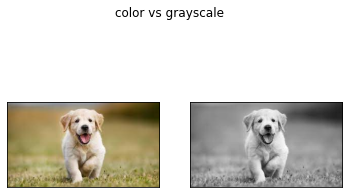

In [19]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)  #1 row, 2 column, work on the first figure
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)  #1 row, 2 column, work on the second figure
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color vs grayscale")
plt.show()

In [ ]:
# 3 method concatenate (join array)
gray = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

#img_combined = np.hstack((img,gray))
img_combined = np.concatenate((img,gray), axis = 1)
show_img("joined", img_combined)

Exercise 3

In [8]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
    
#cv.namedWindow("frame", cv.WINDOW_NORMAL)

new_height = 600
new_width = 400
fps = 30
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
out = cv.VideoWriter('smaller_img_pexels.avi',fourcc,fps, (new_width, new_height))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    resize_frame = cv.resize(frame, (new_width,new_height)) 
    
    cv.imshow("resized video", resize_frame)
    if cv.waitKey(1) & 0xFF == 27:
        break
        
    out.write(resize_frame)
    
cap.release()
out.release()
cv.destroyAllWindows()

Exercise 4

In [35]:
#First method
img = cv.imread("images/dog.jfif")

cv.imshow("normal size", img)

resized = cv.resize(img, None, fx=3, fy=3, interpolation = cv.INTER_LINEAR)
show_img("resized w/ Linear", resized)

cv.waitKey(0)
cv.destroyAllWindows()

# the output is blurry yet the details can been seen vividly

In [36]:
#Second method
img = cv.imread("images/dog.jfif")

cv.imshow("normal size", img)

resized = cv.resize(img, None, fx=3, fy=3, interpolation = cv.INTER_CUBIC)
show_img("resized w/ Cubic", resized)

cv.waitKey(0)
cv.destroyAllWindows()

# The output of the image are relatively smoother edges compared to linear

In [37]:
#Third method
img = cv.imread("images/dog.jfif")

cv.imshow("normal size", img)

resized = cv.resize(img, None, fx=3, fy=3, interpolation = cv.INTER_NEAREST)
show_img("resized w/ nearest", resized)

cv.waitKey(0)
cv.destroyAllWindows()

#comment: the output shows more obviously that the image is more pixalated